In [1]:
import statsmodels.api as sm
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px

In [2]:
df = pd.read_csv("E:\\Dessertation\\desertion_dkit_msc_2022_sep\\suicide_master.csv")
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Thailand,2016,female,75+ years,69,1589015,4.34,Thailand2016,NaN,4.120000e+11,6713,Silent
27816,Thailand,2016,female,55-74 years,222,6049756,3.67,Thailand2016,NaN,4.120000e+11,6713,Boomers
27817,Thailand,2016,female,35-54 years,375,10629684,3.53,Thailand2016,NaN,4.120000e+11,6713,Generation X
27818,Thailand,2016,female,25-34 years,116,4702656,2.47,Thailand2016,NaN,4.120000e+11,6713,Millenials
27819,Thailand,2016,female,15-24 years,60,4525574,1.33,Thailand2016,NaN,4.120000e+11,6713,Millenials


In [3]:
# remove special character
df.columns = df.columns.str.replace(' ', '')

In [4]:
df.columns = map(str.lower, df.columns)

In [5]:
df.rename( {'gdp_for_year($)':'yearly_gdp' } , axis=1 , inplace = True)
df.rename( {'gdp_per_capita($)':'gdp_per_capita' } , axis=1 , inplace = True)
df.rename( {'hdiforyear':'yearly_hdi' } , axis=1 , inplace = True)
df.rename( {'suicides/100kpop':'sucid_in_hundredk' } , axis=1 , inplace = True)
df.rename( {'suicides_no':'suicides' } , axis=1 , inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides           27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   sucid_in_hundredk  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   yearly_hdi         8364 non-null   float64
 9   yearly_gdp         27820 non-null  float64
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,27820,101,Austria,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,27820.0,NaN,NaN,NaN,2001.258375,8.469055,1985.0,1995.0,2002.0,2008.0,2016.0
sex,27820,2,female,13910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,27820,6,55-74 years,4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suicides,27820.0,NaN,NaN,NaN,242.574407,902.047917,0.0,3.0,25.0,131.0,22338.0
population,27820.0,NaN,NaN,NaN,1844793.617398,3911779.441756,278.0,97498.5,430150.0,1486143.25,43805214.0
sucid_in_hundredk,27820.0,NaN,NaN,NaN,12.816097,18.961511,0.0,0.92,5.99,16.62,224.97
country-year,27820,2321,Cuba2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yearly_hdi,8364.0,NaN,NaN,NaN,0.776601,0.093367,0.483,0.713,0.779,0.855,0.944
yearly_gdp,27820.0,NaN,NaN,NaN,445597926548.398254,1453907394884.571777,46919625.0,8985352832.0,48114688201.0,260000000000.0,18100000000000.0


In [8]:
df.head()

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,gdp_per_capita,generation
0,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,Generation X
1,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,Boomers
2,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,Silent
3,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,Generation X
4,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,G.I. Generation


In [9]:
df_cont = pd.read_csv("E:\\Dessertation\\desertion_dkit_msc_2022_sep\\countryContinent.csv")
df_cont.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,�land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [10]:
def find_mismatch (array_1, array_2, only_out=True):
    for i in array_1.unique():
         if i in array_2.unique():
            pass
         else:
            
            print(i, "is not found !")
            
    
find_mismatch(df.country, df_cont.country, True)

Republic of Korea is not found !
Saint Vincent and Grenadines is not found !
United Kingdom is not found !
United States is not found !
Macau is not found !


In [11]:
final = df.merge(df_cont[['country', 'continent', 'code_3']])
final.rename( {'code_3':'country_code' } , axis=1 , inplace = True)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26392 entries, 0 to 26391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            26392 non-null  object 
 1   year               26392 non-null  int64  
 2   sex                26392 non-null  object 
 3   age                26392 non-null  object 
 4   suicides           26392 non-null  int64  
 5   population         26392 non-null  int64  
 6   sucid_in_hundredk  26392 non-null  float64
 7   country-year       26392 non-null  object 
 8   yearly_hdi         8040 non-null   float64
 9   yearly_gdp         26392 non-null  float64
 10  gdp_per_capita     26392 non-null  int64  
 11  generation         26392 non-null  object 
 12  continent          26392 non-null  object 
 13  country_code       26392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 3.0+ MB


In [12]:
url = 'E:\\Dessertation\\desertion_dkit_msc_2022_sep\\suicide_moredata.csv'

second_data = pd.read_csv(url)
second_data.tail()
# second_data.head().T

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Physicians (per 1,000 people)",Strength of legal rights index (0=weak to 12=strong),"Labor force, total","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Refugee population by country or territory of origin,"Contributing family workers, total (% of total employment) (modeled ILO estimate)",Access to electricity (% of population),"Lower secondary completion rate, total (% of relevant age group)"
15105,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15106,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15107,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15108,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15109,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
second_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   country                                                                            15110 non-null  object 
 1   year                                                                               15110 non-null  int64  
 2   sex                                                                                15110 non-null  object 
 3   age                                                                                15110 non-null  object 
 4   suicides_no                                                                        15110 non-null  int64  
 5   population                                                                         15110 non-null  int

In [14]:
second_data.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k', 'country-year', 'yearlyHDI',
    'GDPpyear', 'GDPpcapita', 'generation', 'suicide%', 'Internetusers', 'Expenses', 'employeecompensation','Unemployment', 'Physiciansp1000', 'Legalrights', 'Laborforcetotal','Lifeexpectancy', 'Mobilesubscriptionsp100','Refugees', 'Selfemployed', 'electricityacess', 'secondarycompletion']

In [15]:
df.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [16]:
second_data.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [17]:
second_data.rename( {'GDPpyear':'yearly_gdp' } , axis=1 , inplace = True)
second_data.rename( {'GDPpcapita':'gdp_per_capita' } , axis=1 , inplace = True)
second_data.rename( {'yearlyHDI':'yearly_hdi' } , axis=1 , inplace = True)
second_data.rename( {'suicidesper100k':'sucid_in_hundredk' } , axis=1 , inplace = True)
second_data.rename( {'suicides_no':'suicides' } , axis=1 , inplace = True)

In [18]:
second_data.columns = map(str.lower, second_data.columns)

In [19]:
# remove special character
second_data.columns = second_data.columns.str.replace(' ', '')

In [20]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26392 entries, 0 to 26391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            26392 non-null  object 
 1   year               26392 non-null  int64  
 2   sex                26392 non-null  object 
 3   age                26392 non-null  object 
 4   suicides           26392 non-null  int64  
 5   population         26392 non-null  int64  
 6   sucid_in_hundredk  26392 non-null  float64
 7   country-year       26392 non-null  object 
 8   yearly_hdi         8040 non-null   float64
 9   yearly_gdp         26392 non-null  float64
 10  gdp_per_capita     26392 non-null  int64  
 11  generation         26392 non-null  object 
 12  continent          26392 non-null  object 
 13  country_code       26392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 3.0+ MB


In [21]:
def find_mismatch (array_1, array_2, only_out=True):
    for i in array_1.unique():
         if i in array_2.unique():
            pass
         else:
            
            print(i, "is not found !")
            
    
find_mismatch(second_data.country, df_cont.country, True)

United Kingdom is not found !
United States is not found !


In [22]:
second_data = second_data.merge(df_cont[['country', 'continent', 'code_3']])

In [23]:
second_data.rename( {'code_3':'country_code' } , axis=1 , inplace = True)
second_data.rename( {'suicide%':'suicides' } , axis=1 , inplace = True)
second_data.rename( {'physiciansp1000':'physician_price' } , axis=1 , inplace = True)
second_data.rename( {'mobilesubscriptionsp100':'mobilesubscriptions' } , axis=1 , inplace = True)

In [24]:
second_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_hdi', 'yearly_gdp',
       'gdp_per_capita', 'generation', 'suicides', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'legalrights', 'laborforcetotal', 'lifeexpectancy',
       'mobilesubscriptions', 'refugees', 'selfemployed', 'electricityacess',
       'secondarycompletion', 'continent', 'country_code'],
      dtype='object')

In [25]:
second_data.shape

(14366, 28)

In [26]:
df.shape

(27820, 12)

In [27]:
#good sample of the different regions.

countrynames = ['Argentina','Armenia','Australia',    'Austria',
    'Belgium',    'Brazil',    'Bulgaria',    'Canada',    'Chile',    'Colombia',    'Croatia',    'Cuba',    'Czech Republic',    'Denmark',
    'Finland',    'France',    'Germany',    'Greece',    'Hungary',    'Iceland',   'Ireland', 'Israel','Italy','Japan','Mexico', 'Netherlands','New Zealand','Norway','Poland', 'Portugal','Romania','Russian Federation','South Africa', 'Spain','Sweden', 'Switzerland','Thailand', 'Turkmenistan','Ukraine','United Kingdom', 'United States']

# countrynames

In [28]:
df = df.reset_index()
df = df.rename(columns={"index":"rec_id"})
df['rec_id'] = df.index+50000
df.head(2)

,rec_id,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,gdp_per_capita,generation
0,50000,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,Generation X
1,50001,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,Antigua and Barbuda1985,NaN,240923926.0,3850,Boomers


In [29]:
df.tail(2)

,rec_id,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,gdp_per_capita,generation
27818,77818,Thailand,2016,female,25-34 years,116,4702656,2.47,Thailand2016,NaN,4.120000e+11,6713,Millenials
27819,77819,Thailand,2016,female,15-24 years,60,4525574,1.33,Thailand2016,NaN,4.120000e+11,6713,Millenials


In [30]:
second_data = second_data.reset_index()
second_data = second_data.rename(columns={"index":"rec_id"})
second_data['rec_id'] = second_data.index+1
second_data = second_data.set_index('rec_id')
second_data.tail(2)

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,...,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,secondarycompletion,continent,country_code
rec_id,,,,,,,,,,,,,,,,,,,,,
14365,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Asia,UZB
14366,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Asia,UZB


In [31]:
df = df.set_index('rec_id')
df.tail(2)

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,gdp_per_capita,generation
rec_id,,,,,,,,,,,,
77818,Thailand,2016,female,25-34 years,116,4702656,2.47,Thailand2016,NaN,4.120000e+11,6713,Millenials
77819,Thailand,2016,female,15-24 years,60,4525574,1.33,Thailand2016,NaN,4.120000e+11,6713,Millenials


### Collapsing categories with string matching

In [32]:
countries_2 = second_data['country'].unique()
print(countries_2)

['Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Belgium'
 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'Colombia' 'Croatia' 'Cuba'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Georgia' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'
 'Mexico' 'Mongolia' 'Netherlands' 'New Zealand' 'Norway' 'Poland'
 'Portugal' 'Romania' 'Russian Federation' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkey' 'Turkmenistan' 'Ukraine'
 'United Arab Emirates' 'Uzbekistan']


In [33]:
countries = df['country'].unique()
print(countries)

['Antigua and Barbuda' 'Argentina' 'Australia' 'Austria' 'Bahamas'
 'Bahrain' 'Barbados' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'Colombia' 'Costa Rica' 'Dominica' 'Ecuador' 'France' 'Greece' 'Grenada'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Kuwait'
 'Luxembourg' 'Malta' 'Mauritius' 'Mexico' 'Netherlands' 'New Zealand'
 'Panama' 'Paraguay' 'Portugal' 'Puerto Rico' 'Republic of Korea'
 'Saint Vincent and Grenadines' 'Seychelles' 'Singapore' 'Spain'
 'Sri Lanka' 'Suriname' 'Thailand' 'Trinidad and Tobago' 'United Kingdom'
 'United States' 'Uruguay' 'Belize' 'Guatemala' 'Norway' 'Saint Lucia'
 'Albania' 'Finland' 'Sweden' 'Turkmenistan' 'Ukraine' 'Guyana' 'Romania'
 'Russian Federation' 'Armenia' 'Azerbaijan' 'Belarus' 'Czech Republic'
 'El Salvador' 'Georgia' 'Germany' 'Kazakhstan' 'Kyrgyzstan' 'Poland'
 'Saint Kitts and Nevis' 'Uzbekistan' 'Hungary' 'Kiribati' 'Cuba'
 'Philippines' 'Slovakia' 'Denmark' 'Macau' 'Aruba' 'Croatia' 'Estonia'
 'Latvia' 'Lithuania' 'Q

In [34]:
# # Import process
# from fuzzywuzzy import process

# # For each correct category
# for country in df['country']:
#     # Find potential matches in countrys with typoes
#     matches = process.extract(country, second_data['country'], limit = second_data.shape[0])
#     # For each potential match match
#     for potential_match in matches:
#         # If high similarity score
#         if potential_match[1] >= 80:
#             # Replace typo with correct category
#             second_data.loc[second_data['country'] == potential_match[0], 'country'] = country

In [35]:
# # Import recordlinkage
# import recordlinkage
# # Create indexing object
# indexer = recordlinkage.Index()
# # Generate pairs blocked on state
# indexer.block('country')
# full_pairs = indexer.index(df, second_data)

# print(full_pairs)

In [36]:

# # Create a Compare object
# compare_cl = recordlinkage.Compare()
# # Find exact matches for pairs of date_of_birth and state
# compare_cl.exact('age', 'age', label='age')
# compare_cl.exact('country', 'country', label='country')
# compare_cl.exact('sucid_in_hundredk', 'sucid_in_hundredk', label='sucid_in_hundredk')

# # Find similar matches for pairs of surname and address_1 using string similarity
# compare_cl.string('generation', 'generation', threshold=0.85, label='generation')
# compare_cl.string('sex', 'sex', threshold=0.85, label='sex')
# # Find matches
# potential_matches = compare_cl.compute(full_pairs, df, second_data)


In [37]:
# print(potential_matches)

In [38]:
# matches = potential_matches[potential_matches.sum(axis=1) >= 3]
# print(matches)

In [39]:
# matches.index

In [40]:
# # Get indices from census_B only
# duplicate_rows = matches.index.get_level_values(1)
# print(duplicate_rows)

In [41]:
# potential_matches

In [42]:
# # Finding duplicates in second_data
# second_duplicates = df[df.index.isin(duplicate_rows)]
# # Finding new rows in df
# second_data_new = df[~df.index.isin(duplicate_rows)]
# # second_data_new
# second_duplicates

In [43]:
# # Link the DataFrames!
# full_census = df.append(second_data_new)

# # full_census.drop_duplicates()
# full_census

In [44]:
df1 = second_data.copy()
final = df1.iloc[np.where(df1.country == countrynames[0])]
for i, x in enumerate(countrynames[1:]):
    final = final.append(df1.iloc[np.where(df1.country == x)])
    
# df.head()

In [45]:
final.shape

(13276, 28)

In [46]:
final = final[final.year >= 1985]
final = final[final.year <= 2016]

In [47]:
final['country'] = final['country'].astype('category')
final['continent'] = final['continent'].astype('category')
final['sex'] = final['sex'].astype('category')
final['generation'] = final['generation'].astype('category')
final['age'] = final['age'].astype('category')

In [48]:
final.head(2)

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,...,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,secondarycompletion,continent,country_code
rec_id,,,,,,,,,,,,,,,,,,,,,
1,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
2,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG


In [49]:
# final['year'] = pd.to_datetime(df['year'],# Attempt to infer format of each date
# infer_datetime_format=True,
# # Return NA for rows where conversion failed
# errors = 'coerce')

# final['year'] = pd.to_datetime(final['year'])

In [50]:
# final.tail()

In [51]:
df.rename( {'suicides_no':'suicides' } , axis=1 , inplace = True)

In [52]:
# pd.to_datetime(final['year'],# Attempt to infer format of each date
# infer_datetime_format=True,
# # Return NA for rows where conversion failed
# errors = 'coerce')

# final['year'] = pd.DatetimeIndex(final['year']).year

# final

### Missingness Data

In [53]:
# Get summary of missingness
final.isna().sum()

country                    0
year                       0
sex                        0
age                        0
suicides                   0
population                 0
sucid_in_hundredk          0
country-year               0
yearly_hdi              9124
yearly_gdp                 0
gdp_per_capita             0
generation                 0
suicides                   0
internetusers             84
expenses                1152
employeecompensation    1200
unemployment               0
physician_price         2064
legalrights             8328
laborforcetotal            0
lifeexpectancy             0
mobilesubscriptions        0
refugees                 132
selfemployed               0
electricityacess         312
secondarycompletion     4956
continent                  0
country_code               0
dtype: int64

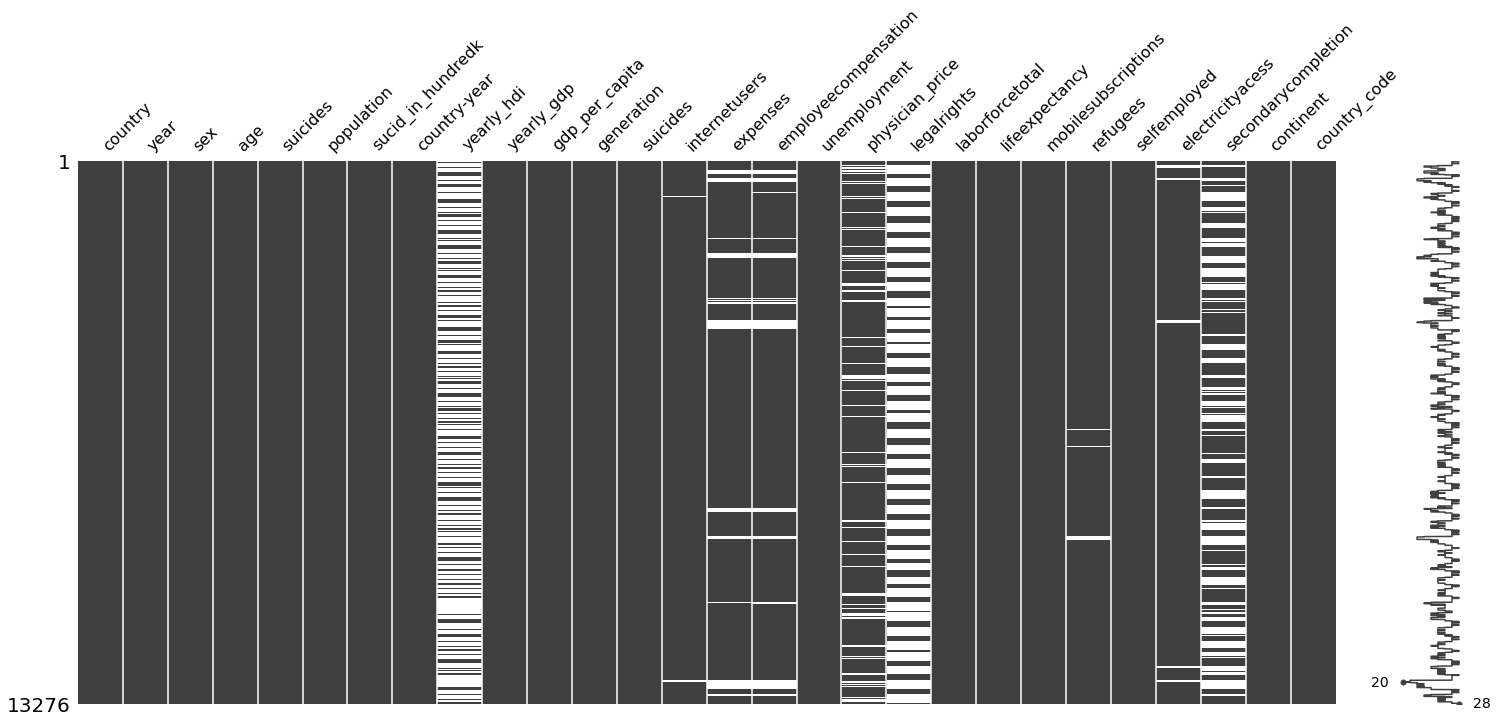

In [54]:
# Useful package for visualizing and understanding missing data
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missingness
msno.matrix(final)
plt.show()

In [55]:
# Isolate missing and complete values aside
missing_hdi = final[final['yearly_hdi'].isna()]
complete_hdi = final[~final['yearly_hdi'].isna()]


In [56]:
missing_hdi.describe()

,year,suicides,population,sucid_in_hundredk,yearly_hdi,yearly_gdp,gdp_per_capita,suicides,internetusers,expenses,...,unemployment,physician_price,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,secondarycompletion
count,9124.000000,9124.000000,9.124000e+03,9124.000000,0.0,9.124000e+03,9124.000000,9124.000000,9040.000000,8296.000000,...,9124.000000,7636.000000,3472.000000,9.124000e+03,9124.000000,9124.000000,9028.000000,9124.000000,8872.000000,5776.000000
mean,1999.316528,398.808417,2.675820e+06,14.931306,NaN,4.909546e+11,18993.097545,0.014931,18.721017,18.301408,...,5.227582,1.629947,0.013825,1.046639e+07,46.821799,36.334094,11155.957909,2.075908,60.227276,36.322351
std,7.765484,1254.037008,3.868640e+06,19.189067,NaN,8.412982e+11,17235.005103,0.019189,26.212149,17.180872,...,5.712548,1.717781,0.234786,1.872559e+07,36.850168,45.008328,48186.144109,4.528243,48.284712,44.883387
min,1985.000000,0.000000,4.400000e+03,0.000000,NaN,1.201313e+09,357.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993.000000,19.000000,4.304650e+05,2.390000,NaN,6.408769e+10,4312.000000,0.002387,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1999.000000,84.000000,1.018677e+06,8.380000,NaN,1.868300e+11,14544.000000,0.008382,3.148128,18.537786,...,4.274000,1.369900,0.000000,2.598586e+06,71.531000,7.696397,16.000000,0.469000,99.146201,0.000000
75%,2006.000000,276.000000,3.394224e+06,20.047500,NaN,4.550400e+11,28390.000000,0.020044,31.288396,34.929966,...,8.522000,3.200000,0.000000,1.125782e+07,78.150000,77.601842,743.000000,1.827000,100.000000,88.745550
max,2016.000000,22338.000000,2.846186e+07,177.610000,NaN,5.231380e+12,103431.000000,0.177609,93.000000,51.714662,...,33.473000,6.615700,4.000000,9.542172e+07,82.931463,165.661017,551744.000000,30.332001,100.000000,111.923260


In [57]:
complete_hdi.describe()

,year,suicides,population,sucid_in_hundredk,yearly_hdi,yearly_gdp,gdp_per_capita,suicides,internetusers,expenses,...,unemployment,physician_price,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,secondarycompletion
count,4152.000000,4152.000000,4.152000e+03,4152.000000,4152.000000,4.152000e+03,4152.000000,4152.000000,4152.000000,3828.000000,...,4152.000000,3576.000000,1476.000000,4.152000e+03,4152.000000,4152.000000,4116.000000,4152.000000,4092.000000,2544.000000
mean,2004.635838,280.768064,2.507378e+06,13.047040,0.809491,6.447662e+11,25921.404624,0.013047,34.527586,24.022747,...,6.570720,2.218488,1.552846,1.146377e+07,57.485604,63.618038,9803.329446,2.337049,73.531550,54.537283
std,9.206240,641.986372,3.593958e+06,16.328986,0.087930,1.040453e+12,22564.488900,0.016329,33.744718,17.267104,...,5.987349,1.756878,2.777742,1.796641e+07,33.839620,55.607686,49867.723843,4.623033,43.461442,46.433452
min,1985.000000,0.000000,4.500000e+03,0.000000,0.539000,1.468317e+09,426.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1995.000000,18.000000,4.587632e+05,2.210000,0.746000,9.789109e+10,7612.000000,0.002206,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,78.000000,1.008634e+06,7.555000,0.826500,2.580655e+11,19912.000000,0.007554,28.319131,28.512193,...,6.476000,2.597950,0.000000,4.302448e+06,75.581927,72.935384,50.000000,0.660500,100.000000,85.312630
75%,2012.000000,248.250000,3.272471e+06,17.870000,0.884000,5.631100e+11,41184.000000,0.017873,67.089999,38.248283,...,9.146000,3.499100,3.000000,1.752937e+07,80.163415,114.601429,856.000000,2.201000,100.000000,96.620390
max,2014.000000,8073.000000,2.797110e+07,165.960000,0.944000,6.203210e+12,109804.000000,0.165961,96.546800,62.186783,...,30.229000,7.334100,12.000000,9.899009e+07,83.331951,172.121808,396717.000000,31.235001,100.000000,116.367400


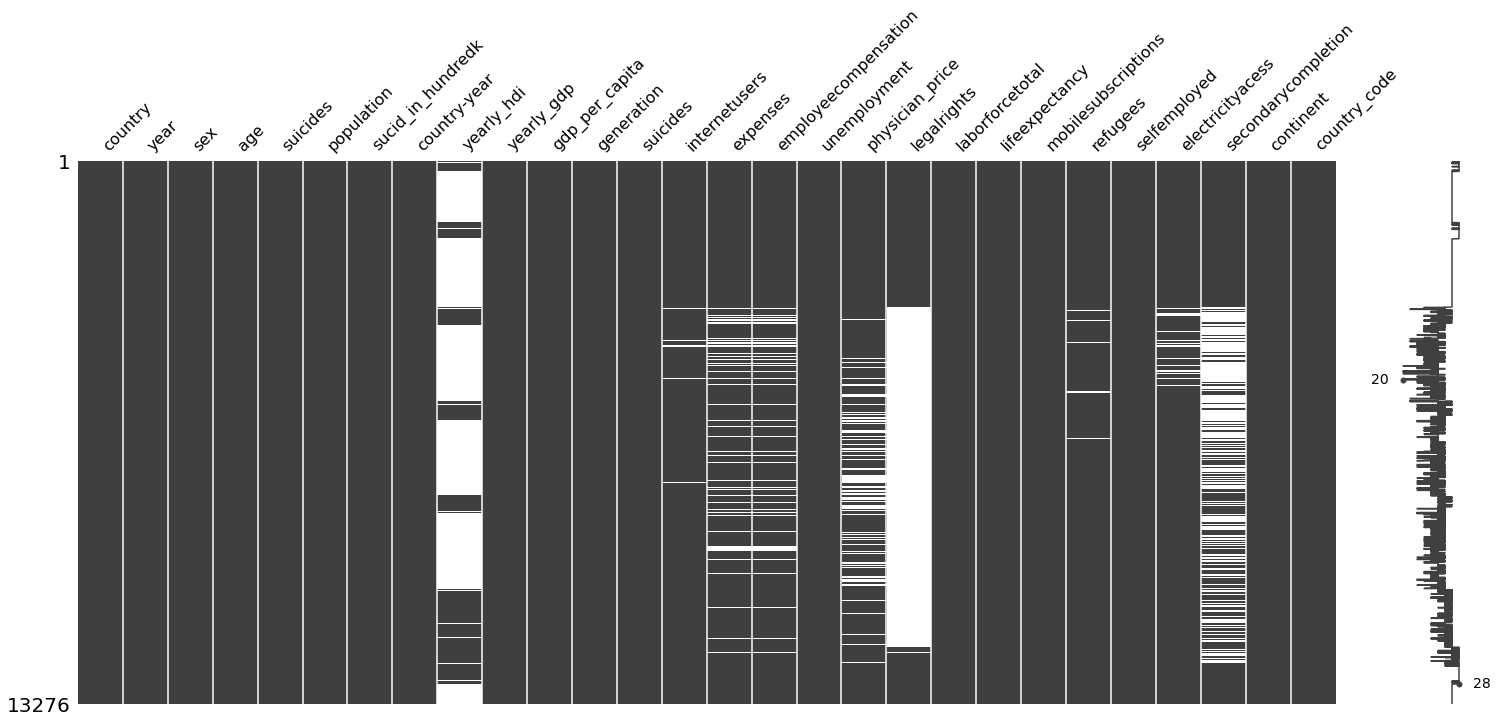

In [58]:
sorted_final = final.sort_values(by = 'year')
msno.matrix(sorted_final)
plt.show()

In [59]:
final.drop('yearly_hdi', axis=1, inplace=True)
final.drop('secondarycompletion', axis=1, inplace=True)
final.drop('legalrights', axis=1, inplace=True)

In [60]:
#checking percentage of missing values
percent_missing = final.isnull().sum() * 100 / len(final)
missing_value_final = pd.DataFrame({'percent_missing': percent_missing})
missing_value_final.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_final

,percent_missing
physician_price,15.546851
employeecompensation,9.038867
expenses,8.677312
electricityacess,2.350105
refugees,0.994275
internetusers,0.632721
continent,0.000000
selfemployed,0.000000
mobilesubscriptions,0.000000
lifeexpectancy,0.000000


in above case yearly_hdi,secondarycompletion and legalrights are missing more than 30%. I will be removing these columns as I am unable to replace the majority of data for them.

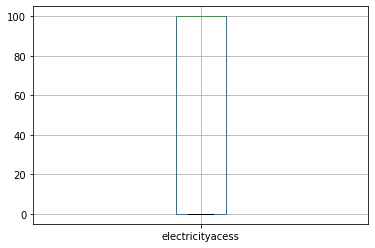

In [61]:
stud_bplt = final.boxplot(column = 'electricityacess')


stud_bplt.plot()


plt.show()

In [62]:
final.internetusers.fillna(final.internetusers	. min(), inplace=True)
final.employeecompensation.fillna(final.employeecompensation.mean(), inplace=True)
final.electricityacess.fillna(final.electricityacess.mean(), inplace=True)
final.refugees.fillna(final.refugees.mean(), inplace=True)
final.expenses.fillna(final.expenses.mean(), inplace=True)
# final.physiciansp1000.fillna(final.physiciansp1000.mean(), inplace=True)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [63]:
percent_missing = final.isnull().sum() * 100 / len(final)
missing_value_final = pd.DataFrame({'percent_missing': percent_missing})
missing_value_final.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_final

,percent_missing
physician_price,15.546851
employeecompensation,9.038867
expenses,8.677312
electricityacess,2.350105
refugees,0.994275
internetusers,0.632721
continent,0.000000
selfemployed,0.000000
mobilesubscriptions,0.000000
lifeexpectancy,0.000000


In [64]:
df.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [65]:
second_data.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [66]:
final.year.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [67]:
final.country.unique()

['Argentina', 'Armenia', 'Australia', 'Austria', 'Belgium', ..., 'Sweden', 'Switzerland', 'Thailand', 'Turkmenistan', 'Ukraine']
Length: 39
Categories (39, object): ['Argentina', 'Armenia', 'Australia', 'Austria', ..., 'Switzerland', 'Thailand', 'Turkmenistan', 'Ukraine']

In [68]:
final.head(2)

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_gdp,gdp_per_capita,...,unemployment,physician_price,laborforcetotal,lifeexpectancy,mobilesubscriptions,refugees,selfemployed,electricityacess,continent,country_code
rec_id,,,,,,,,,,,,,,,,,,,,,
1,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,8.841667e+10,3264,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
2,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,8.841667e+10,3264,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,Americas,ARG


In [69]:
# final.groupby(['year', 'age','country']).size()

In [70]:
final.shape

(13276, 25)

In [71]:
final.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicides', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code'],
      dtype='object')

In [72]:
# cols = ["electricityacess","internetusers","mobilesubscriptions","physician_price"]
# final[cols] = final[cols].replace({'0':np.nan, 0:np.nan})
final['electricityacess'] = final['electricityacess'].mask(np.isclose(final['electricityacess'].values, 0.0))
final['internetusers'] = final['internetusers'].mask(np.isclose(final['internetusers'].values, 0.0))
final['mobilesubscriptions'] = final['mobilesubscriptions'].mask(np.isclose(final['mobilesubscriptions'].values, 0.0))
final['physician_price'] = final['physician_price'].mask(np.isclose(final['physician_price'].values, 0.0))

# final[cols] 

In [73]:
final['electricityacess'] = final['electricityacess'].fillna(final['electricityacess'].min())
final['internetusers'] = final['internetusers'].fillna(final['internetusers'].min())
final['mobilesubscriptions'] = final['mobilesubscriptions'].fillna(final['mobilesubscriptions'].min())
final['physician_price'] = final['physician_price'].fillna(final['physician_price'].min())

In [74]:
final.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicides', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code'],
      dtype='object')

In [75]:
final['internetusers'] = final['internetusers'].replace(r'^\s*$', np.nan, regex=True)
final['unemployment'] = final['unemployment'].replace(r'^\s*$', np.nan, regex=True)
final['physician_price'] = final['physician_price'].replace(r'^\s*$', np.nan, regex=True)
final['internetusers'] = final['internetusers'].replace(r'^\s*$', np.nan, regex=True)
final['laborforcetotal'] = final['laborforcetotal'].replace(r'^\s*$', np.nan, regex=True)
final['selfemployed'] = final['selfemployed'].replace(r'^\s*$', np.nan, regex=True)
final['electricityacess'] = final['electricityacess'].replace(r'^\s*$', np.nan, regex=True)
final['lifeexpectancy'] = final['lifeexpectancy'].replace(r'^\s*$', np.nan, regex=True)
final['mobilesubscription'] = final['mobilesubscriptions'].replace(r'^\s*$', np.nan, regex=True)
final['refugees'] = final['refugees'].replace(r'^\s*$', np.nan, regex=True)
final['expenses'] = final['expenses'].replace(r'^\s*$', np.nan, regex=True)
final['employeecompensation'] = final['employeecompensation'].replace(r'^\s*$', np.nan, regex=True)
final['physician_price'] = final['physician_price'].replace(r'^\s*$', np.nan, regex=True)

In [76]:
final.loc[ final['internetusers'] == 0 | np.isnan(final['internetusers']), 'internetusers' ] = final['internetusers'].mean()
final.loc[ final['unemployment'] == 0 | np.isnan(final['unemployment']), 'unemployment' ] = final['unemployment'].mean()
final.loc[ final['physician_price'] == 0 | np.isnan(final['physician_price']), 'physician_price' ] = final['physician_price'].min()
final.loc[ final['laborforcetotal'] == 0 | np.isnan(final['laborforcetotal']), 'laborforcetotal' ] = final['laborforcetotal'].mean()
final.loc[ final['selfemployed'] == 0 | np.isnan(final['selfemployed']), 'selfemployed' ] = final['selfemployed'].mean()
final.loc[ final['electricityacess'] == 0 | np.isnan(final['electricityacess']), 'electricityacess' ] = final['electricityacess'].mean()
final.loc[ final['lifeexpectancy'] == 0 | np.isnan(final['lifeexpectancy']), 'lifeexpectancy' ] = final['lifeexpectancy'].mean()
final.loc[ final['mobilesubscriptions'] == 0 | np.isnan(final['mobilesubscriptions']), 'mobilesubscriptions' ] = final['mobilesubscriptions'].mean()
final.loc[ final['refugees'] == 0 | np.isnan(final['refugees']), 'refugees' ] = final['refugees'].mean()
final.loc[ final['expenses'] == 0 | np.isnan(final['expenses']), 'expenses' ] = final['expenses'].mean()
final.loc[ final['employeecompensation'] == 0 | np.isnan(final['employeecompensation']), 'employeecompensation' ] = final['employeecompensation'].mean()
final.loc[ final['physician_price'] == 0 | np.isnan(final['physician_price']), 'physician_price' ] = final['physician_price'].mean()

In [77]:
final.shape

(13276, 26)

In [79]:
final.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicides', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code',
       'mobilesubscription'],
      dtype='object')

In [78]:
final.to_csv('E:\\Dessertation\\desertion_dkit_msc_2022_sep\\output.csv',mode = 'w', index=False)
# outputting data to run models in live server